# Продвинутая визуализация с Matplotlib

## Домашнее задание 

### Цель домашнего задания

Отработать навык продвинутой визуализации и форматирования данных с помощью matplotlib. Научиться использовать механизмы стилизации для фокусировки внимания читателей графиков

### Описание домашнего задания и формат сдачи

Выполните предложенные задачи по визуализации данных — впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

При построении графиков необходимо использовать объектно-ориентированный подход (задание графика через объекты Figure и Axes) везде, где это возможно. У всех графиков обязательно должен присутствовать заголовок и подписи осей. Убедитесь, что все метки и подписи осей читаемы и не накладываются друг на друга и на графики. При построении нескольких графиков в одних координатных осях должна быть легенда.

#### Описание данных

Для выполнения домашнего задания необходимо использовать датасет `vgsales.csv`, загрузка которого будет приведена ниже. Этот датасет содержит информацию о суммарных продажах видеоигр для игровых консолей. Описание признаков:
* `Rank` - порядковый номер записи в датасете
* `Name` - наименование игры
* `Platform` - платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и др.)
* `Year` - год выпуска игры
* `Genre` - жанр игры
* `Publisher` - наименование компании-издателя игры
* `NA_Sales` - объем продаж игры в Северной Америке, млн. копий
* `EU_Sales` - объем продаж игры в Европе, млн. копий
* `JP_Sales` - объем продаж игры в Японии, млн. копий
* `Other_Sales` - объем продаж игры в остальных странах, млн. копий
* `Global_Sales` - объем продаж игры по всему миру, млн. копий

### Критерии оценки

**"Зачет"** - выполнены задачи 1-6, каждый график отформатирован и читаем

**"На доработку"** - выполнены не все обязательные задачи или какой-либо из график не читаем или не подписан

### Рекомендации по выполнению

* Библиотеки, которые необходимы для выполнения домашнего задания, перечислены в ячейке ниже.
* Подсказка по работе с Jupyter: если перед графиком выводится слишком много текста, поставьте ';' в конце последней строки ячейки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загрузка данных

In [2]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Задача 1

Постройте линейный график динамики объема продаж всех игр жанра "Sports" в Японии. Задайте графику размер 12 на 6

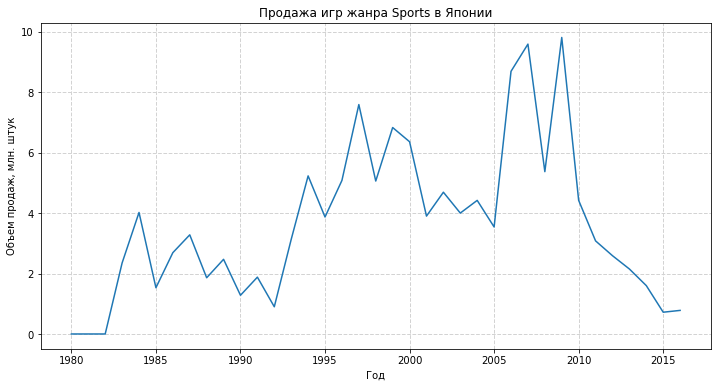

In [3]:
JP_Sport_Sales = df[df['Genre'] == 'Sports'].groupby('Year').agg('sum')['JP_Sales']

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(JP_Sport_Sales)
ax.set_title('Продажа игр жанра Sports в Японии')
ax.set_ylabel('Объем продаж, млн. штук')
ax.set_xlabel('Год')
ax.grid(color='lightgray', linewidth=1, linestyle='--')


### Задача 2

В одних координатных осях постройте линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире

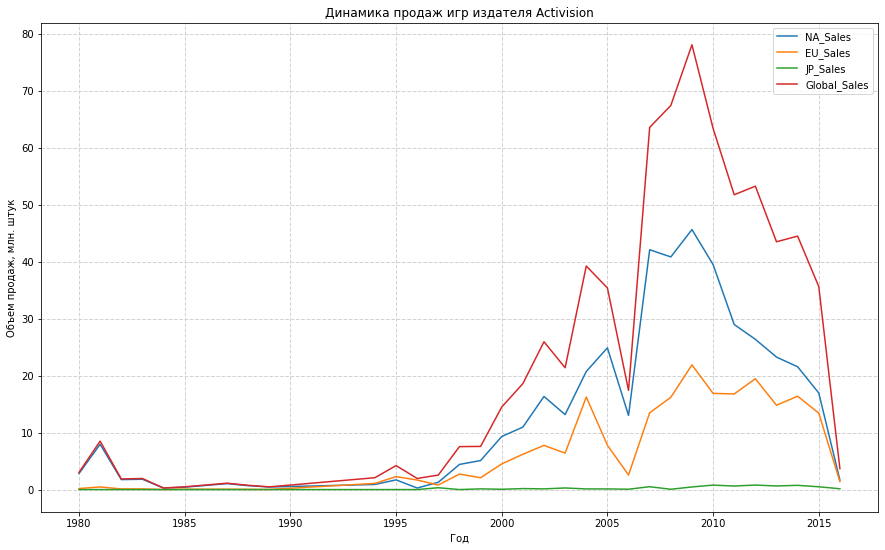

In [4]:
activision_sales = df[df['Publisher'] == 'Activision'].groupby('Year').agg('sum')

sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']

fig, ax = plt.subplots(figsize=(15,9))

for i, sale in enumerate(sales):
    ax.plot(activision_sales[sale], label=sale)
    
ax.set_xlabel('Год')
ax.set_ylabel('Объем продаж, млн. штук')
ax.set_title('Динамика продаж игр издателя Activision')
ax.grid(color='lightgray', linewidth=1, linestyle='--')
ax.legend()

plt.show()

### Задача 3

В цикле (т.е. на разных координатных осях) постройте линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире

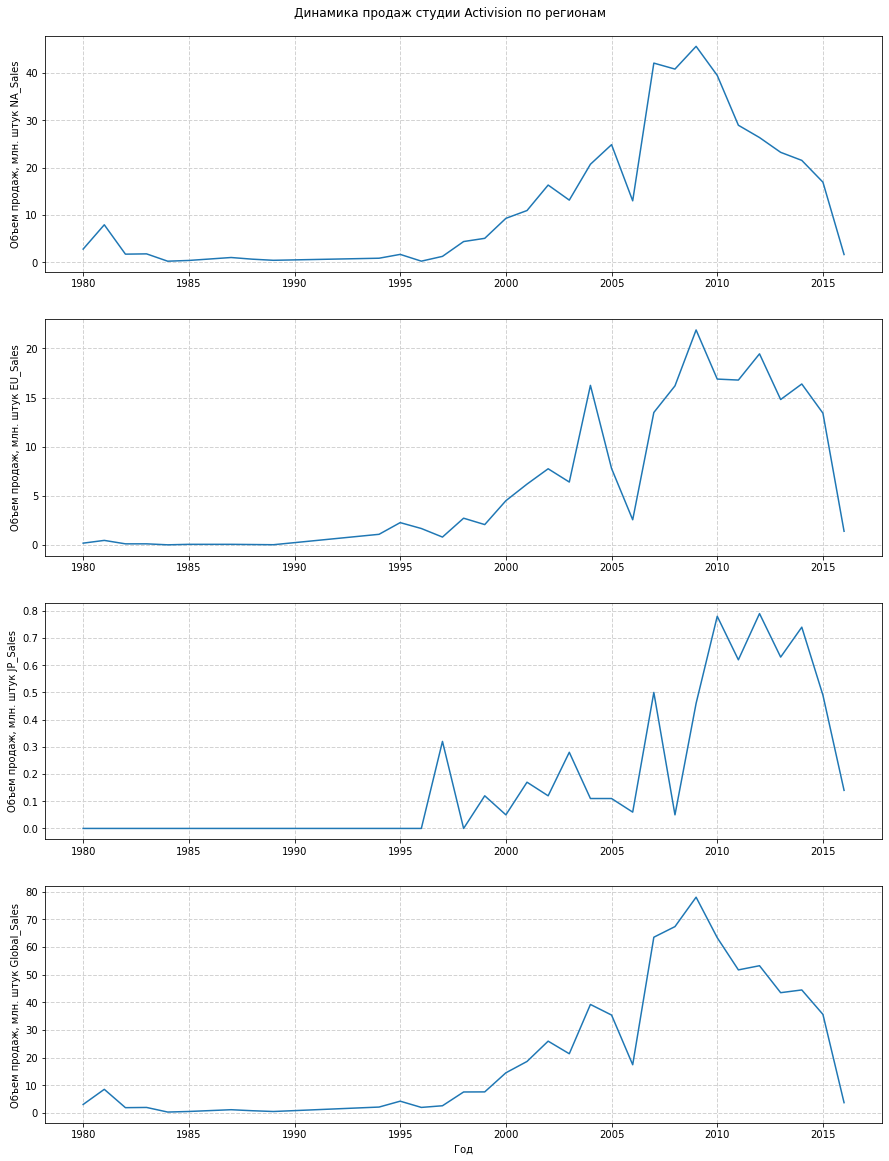

In [5]:
fig, axs = plt.subplots(ncols=1, nrows=4, figsize=(15,20))

for i, sale in enumerate(sales):
    ax = axs[i]
    ax.plot(activision_sales[sale])
    ax.set_ylabel('Объем продаж, млн. штук ' + sale)
    ax.grid(color = 'lightgray', linewidth=1, linestyle='--')
    if i == len(sales) - 1:
        ax.set_xlabel('Год')

plt.suptitle('Динамика продаж студии Activision по регионам', y=0.9)
plt.show()


### Задача 4

Постройте такие же линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире на одном полотне в сетке 2 на 2 графика. Итоговое полотно сделайте размером 12 на 12. Все графики должны разделять оси X и Y

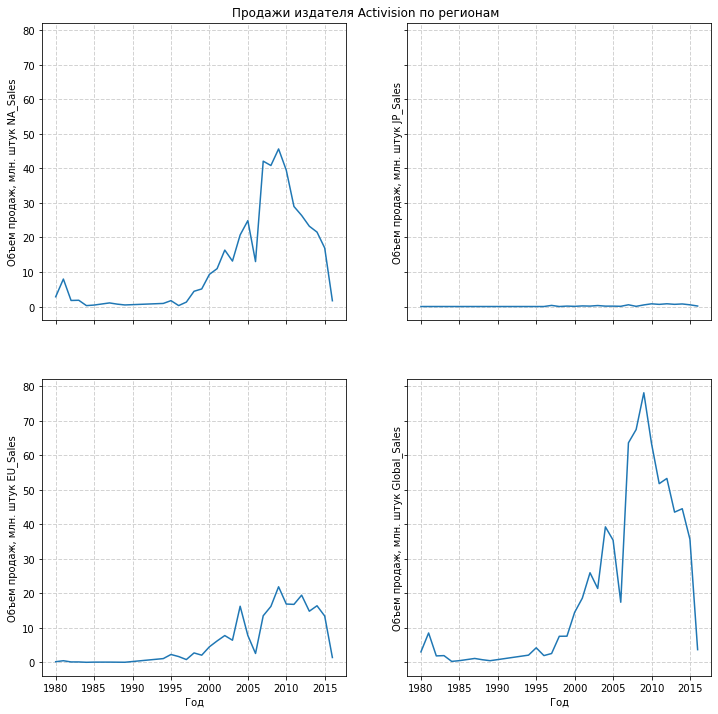

In [6]:
fig, axs = plt.subplots(figsize=(12,12), ncols=2, nrows=2, sharex=True, sharey=True)

for i, sale in enumerate(sales):
    ax = axs[i][0] if i < 2 else axs[i-2][1]
    ax.plot(activision_sales[sale])
    ax.set_ylabel('Объем продаж, млн. штук ' + sale)
    ax.grid(color = 'lightgray', linewidth=1, linestyle='--')
    axs[1][0].set_xlabel('Год')
    axs[1][1].set_xlabel('Год')

fig.suptitle('Продажи издателя Activision по регионам', y=0.9)
plt.show()

### Задача 5

В одной координатной сетке постройте 2 гистограммы распределения мировых продаж игр издателей "Microsoft Game Studios" и "Take-Two Interactive" после 2010 года (включая 2010 год). Графики сделайте полупрозрачными, отсечки должны быть общими и соответствовать ширине столбцов обоих графиков

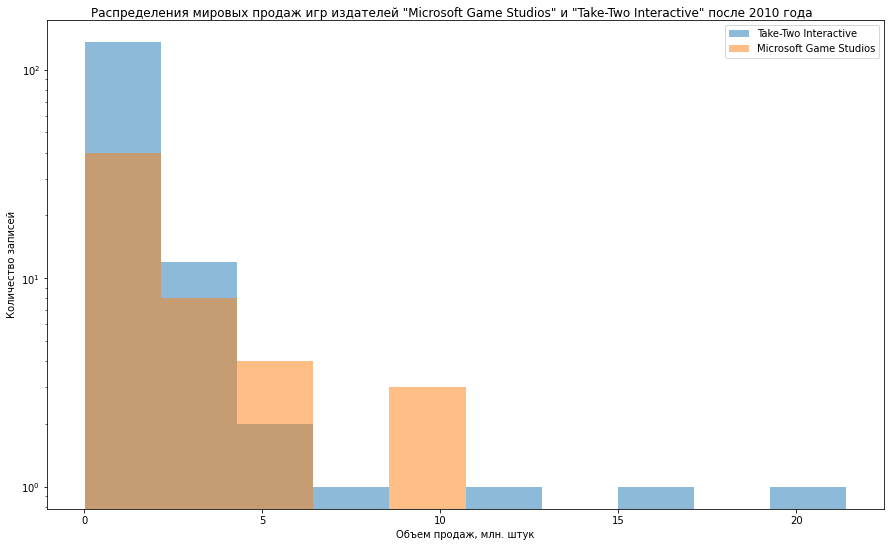

In [7]:
MGS_df = df[(df['Year'] >= 2010) & (df['Publisher'] == 'Microsoft Game Studios')]['Global_Sales']
TTI_df = df[(df['Year'] >= 2010) & (df['Publisher'] == 'Take-Two Interactive')]['Global_Sales']

fig, ax = plt.subplots(figsize=(15,9))

n, bins, patches = ax.hist(TTI_df, bins=10, alpha=0.5, log=True, label='Take-Two Interactive')
n, bins, patches = ax.hist(MGS_df, bins=bins, alpha=0.5, log=True, label='Microsoft Game Studios')
ax.set_xlabel('Объем продаж, млн. штук')
ax.set_ylabel('Количество записей')
fig.suptitle('Распределения мировых продаж игр издателей "Microsoft Game Studios" и "Take-Two Interactive" после 2010 года', y=0.9)
plt.legend()
plt.show()

### Задача 6

Определите 5 платформ, для которых в Японии было продано больше всего игр за все время. Проиллюстрируйте величину продаж на столбчатой диаграмме, столбец с самым высоким значением окрасьте зеленым, а с самым низким - красным

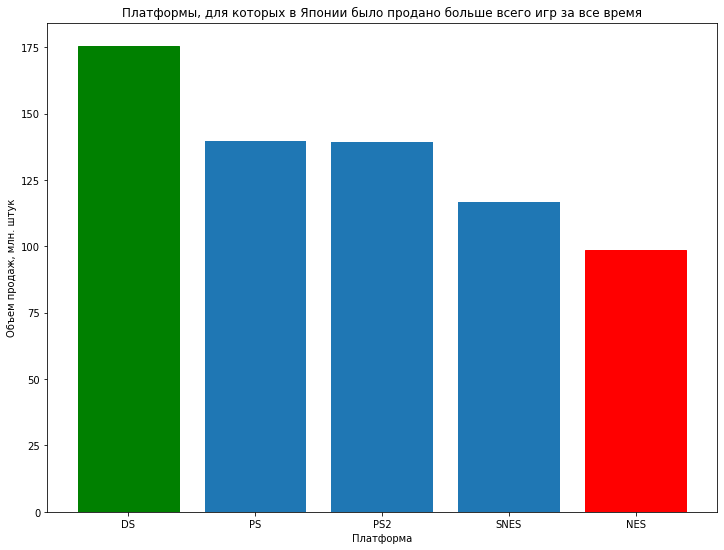

In [8]:
top5_JP_Sales = df.groupby('Platform').agg('sum').sort_values('JP_Sales', ascending=False).head(5)

fig, ax = plt.subplots(figsize=(12,9))
bars = ax.bar(top5_JP_Sales.index, top5_JP_Sales['JP_Sales'])
ax.set_title('Платформы, для которых в Японии было продано больше всего игр за все время')
ax.set_xlabel('Платформа')
ax.set_ylabel('Объем продаж, млн. штук')

bars[0].set_color('green')
bars[-1].set_color('red')

plt.show()

## Дополнительные (необязательные) задачи


### Задача 7

Постройте линейный график динамики количества игр, выпускаемых Nintendo, по годам. С помощью numpy или pandas определите промежуток, в который издатель каждый год выпускал больше 35 игр, и подсветите этот промежуток времени с помощью зеленого полупрозрачного прямоугольника

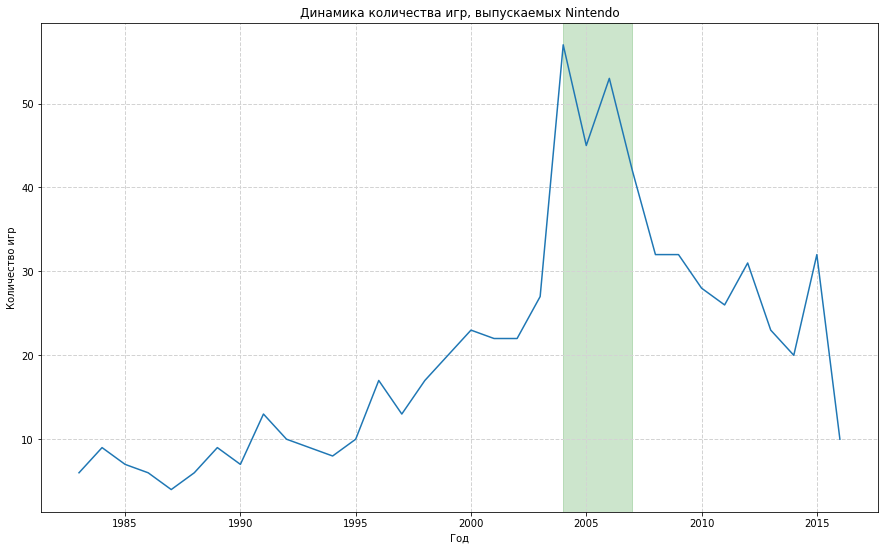

In [9]:
data = df[df['Publisher'] == 'Nintendo'].groupby('Year').count().reset_index()[['Year', 'Name']]

fig, ax = plt.subplots(figsize=(15,9))
ax.plot(data['Year'], data['Name'])
ax.set_title('Динамика количества игр, выпускаемых Nintendo')
ax.set_xlabel('Год')
ax.set_ylabel('Количество игр')
ax.grid(color='lightgray', linewidth=1, linestyle='--')

ax.axvspan(xmin=2004, xmax=2007, color='green', alpha=0.2)

plt.show()

In [10]:
years = data[data['Name'] > 35]
years

,Year,Name
21,2004.0,57
22,2005.0,45
23,2006.0,53
24,2007.0,42


### Задача 8

Определите 3 жанра и 4 издателя с самыми большими продажами игр в мире за все время. Постройте сетку графиков 4 на 3, в каждой ячейке постройте точечный график, проверяющий зависимость общемировых продаж от продаж в Северной Америке для каждой пары (жанр, издатель). Размер итогового полотна определите самостоятельно таким образом, чтобы все графики были видны

In [49]:
top3_genre = df.groupby('Genre').agg('sum').sort_values('Global_Sales', ascending=False).reset_index().head(3)
top4_publishers = df.groupby('Publisher').agg('sum').sort_values('Global_Sales', ascending=False).reset_index().head(4)
list_of_top3_genre = list(top3_genre['Genre'])
list_of_top4_publisher = list(top4_publishers['Publisher'])

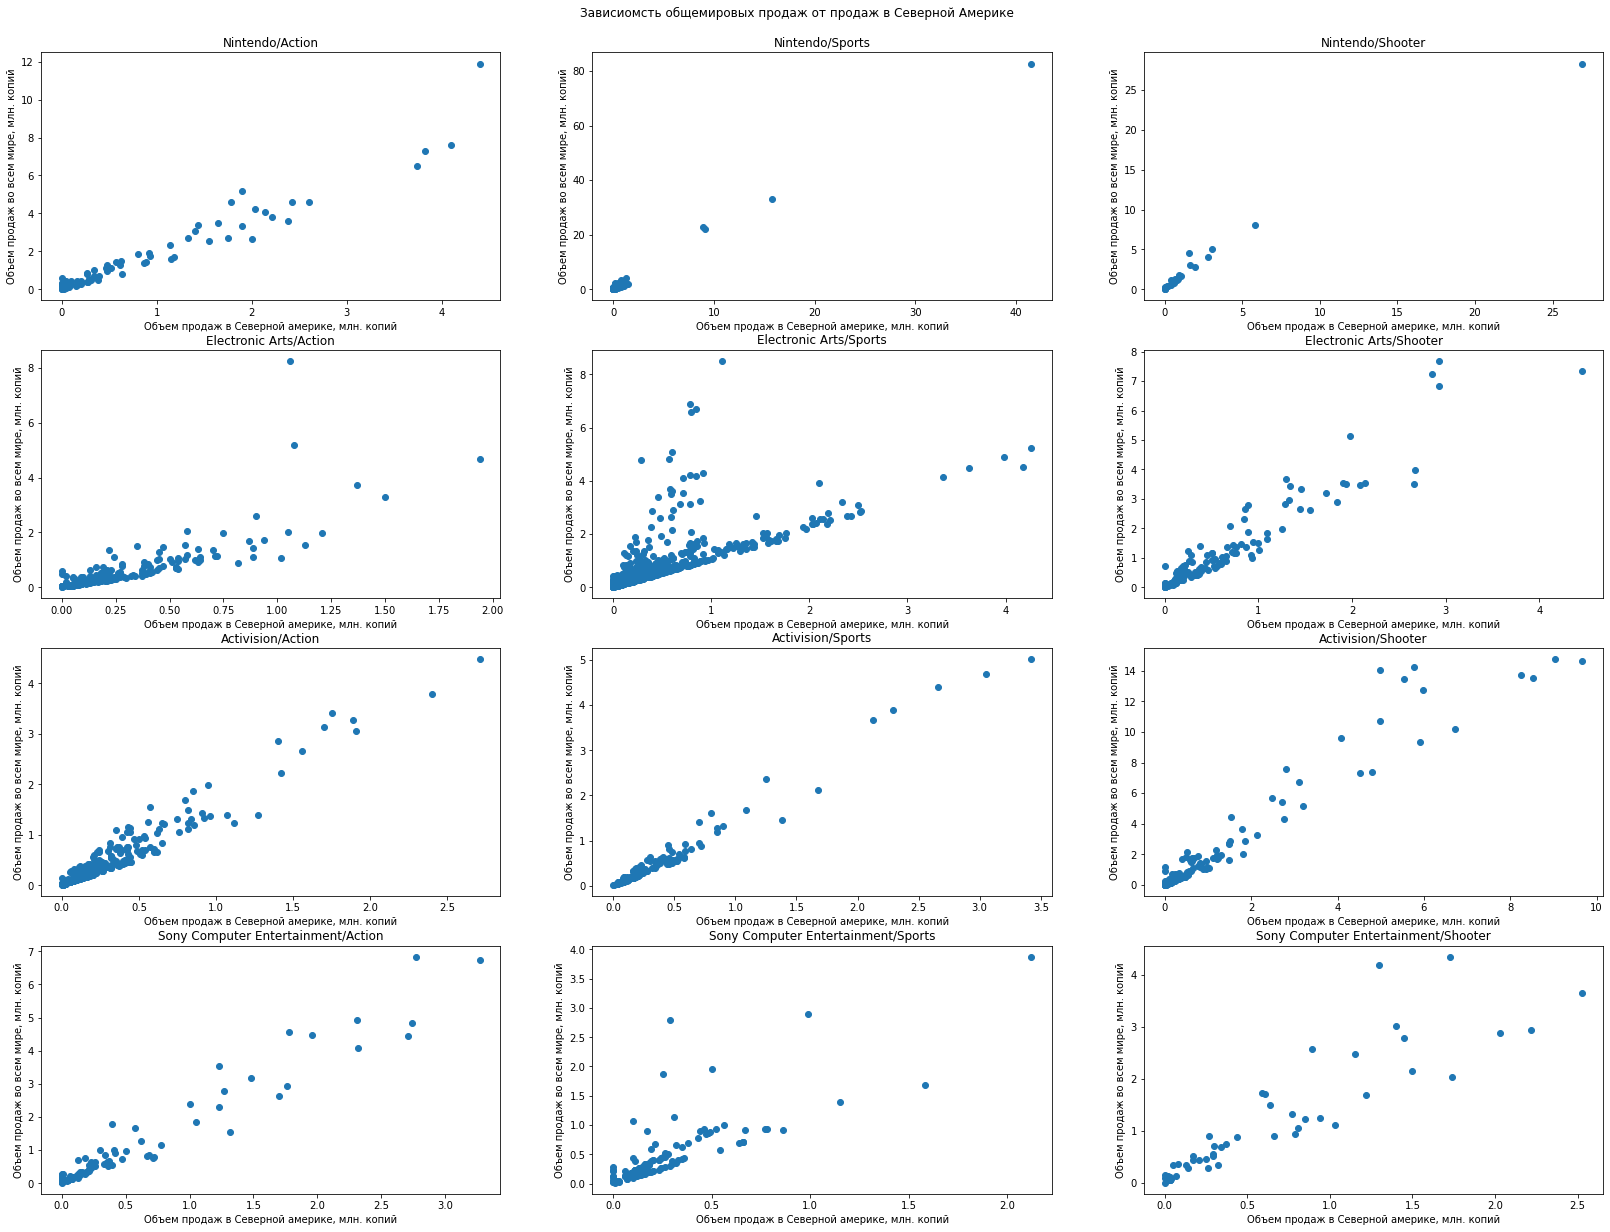

In [50]:
fig, axs = plt.subplots(figsize=(28,21), nrows=4, ncols=3)

for i, publisher in enumerate(list_of_top4_publisher):
    for j, genre in enumerate(list_of_top3_genre):
        ax = axs[i][j]
        ax.scatter(df[(df['Genre'] == genre) & (df['Publisher'] == publisher)]['NA_Sales'],
                  df[(df['Genre'] == genre) & (df['Publisher'] == publisher)]['Global_Sales'])
        ax.set_title(publisher + '/' + genre)
        ax.set_xlabel('Объем продаж в Северной америке, млн. копий')
        ax.set_ylabel('Объем продаж во всем мире, млн. копий')

plt.suptitle('Зависиомсть общемировых продаж от продаж в Северной Америке', y=0.91)
plt.show()